シクロヘキサンの反転を量子化学計算し、安定なコンフォーマーと遷移状態を求める。    中田真秀

シクロヘキサンの反転を量子化学計算し、安定なコンフォーマーと遷移状態を求めるのがこのjupyter notebookの主題である。
教科書通り、イス型 (chair) 、半イス型 (half-chair) 、ボート型 (boat) 、ひずみボート型 (twist-boat) が得られた。
量子化学計算はGrimmeのGF2-xTB、コンフォーマーを求めるのはGrimmeらのcrest、遷移状態を求めるためにはZimmermanらのmoleculer GSMを用いた。

ただ、教科書通りというのには<a href="https://pubs.acs.org/doi/pdf/10.1021/ed074p813">A Three-Dimensional Energy Surface for the Conformational Inversion of Cyclohexane</a>でも指摘されているように語弊がある。実際はボート型を経由しなくともシクロヘキサンの反転は行える。従って二通りの反転がある。一つ目は、ボート型を経由せず、歪みボート型から直接反転する反転。二つ目は、歪みボート型からボート型を経由する反転である。では、ボート型を経由した反転はそれを経由しない反転とどう違うのだろうか。その答えは、シクロヘキサンが60度回転しながら反転する、であって、エカトリアルとアキシアル位の水素が反転する、ではない。シクロヘキサンは六角形なので60度のねじりをいれるとエカトリアルとアキシアルの水素が反転する。炭素骨格はそのねじりを利用しつつコンフォームを変更する。そして、このボート型へのエネルギー障壁は1～2kcal/molと小さいので、ボート型を経由する、しない、どちらの反転も通常起こっている。

歪みボート型の60度のねじりは鏡像反転とも関連付けられる。お互いはお互いの鏡像関係にある。ただし原子の順番が違っている。

ぜひ、ノートの再現に必要なファイルたちダウンロードして手元の環境で実行して、コンフォーマーの形および安定構造間の構造変化アニメーションを見ていただきたい。残念ながらgithubでは分子を一切見ることができなかった。

簡易再現
<pre>
$ https://github.com/nakatamaho/quantumchemistry_notebook.git
$ cd cyclohexane
</pre>
簡易的に再現するにはこのチェックアウトにあるcyclohexane.ipynbをjupyter-notebookで閲覧すればよい。依存を処理するためにIn[2] は実行せねばならない。そのほかの"!"が先頭に来ているshell scriptのところ以外を適宜実行すると、例えば、In[3]を実行してみると分子を見ることができる。マウスで動かすことも可能である。

推奨環境
<ul>
    <li> Linux Centos 7
    <li> Docker on Windows/Mac/Linux
</ul>

必要なソフト
<ul>
    <li>  <a href="https://github.com/grimme-lab/xtb">xtb semiemprical tight binding DFT</a>    
    <li> <a href="https://github.com/grimme-lab/crest">crest (linux binaryのみ)</a>    
    <li> <a href="https://github.com/ZimmermanGroup/molecularGSM">code for single-ended and double-ended molecular GSM </a>
    <li> <a href="http://openbabel.org/wiki/Main_Page">Open Babel</a>
    <li> <a href="https://pymol.org/2/">pymol</a> (ボート型の遷移状態を求めるために必要)
    <li> <a href="https://github.com/charnley/rmsd">Calculate Root-mean-square deviation (RMSD) of Two Molecules Using Rotation</a>
    <li> <a href="https://software.intel.com/content/www/us/en/develop/tools/math-kernel-library.html">Intel MKL</a>
    <li> <a href="https://software.intel.com/content/www/us/en/develop/articles/redistributable-libraries-for-intel-c-and-fortran-2020-compilers-for-linux.html"> Redistributable Libraries for Intel® C++ and Fortran 2020 Compilers for Linux* </a>
</ul>

参考文献
<ul>
<li> <a href="https://en.wikipedia.org/wiki/Cyclohexane_conformation">Cyclohexane conformation</a>
<li> <a href="https://pubs.acs.org/doi/pdf/10.1021/ed074p813">A Three-Dimensional Energy Surface for the Conformational Inversion of Cyclohexane</a>
<li> <a href="https://pubs.acs.org/doi/10.1021/j100377a041">Ab initio conformational analysis of cyclohexane</a>
</ul>


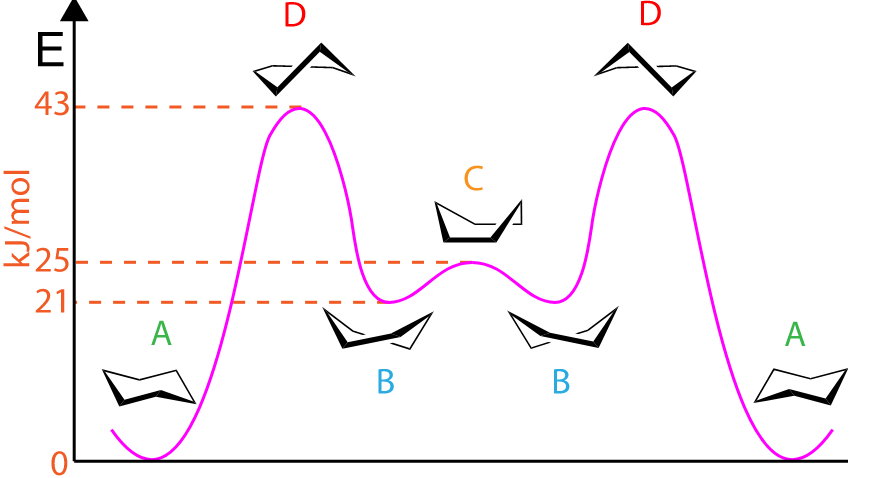

Open Babelでcyclohexaneの三次元構造を生成

In [1]:
!obabel -:"C1CCCCC1" --gen3d -h -o xyz -Ocyclohexane.xyz

1 molecule converted


ここではイス型が得られた。以下でjsmolを使えるようにしておく

In [2]:
!pip3 install jupyter_jsmol

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/opt/pubchemqc//pkg/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
view = JsmolView.from_file("cyclohexane.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

xtbで構造最適化する。これは2秒で終わった(Core i7 4790K, CentOS 7 docker, Windows10)

In [4]:
!/usr/bin/time xtb cyclohexane.xyz --opt

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.3.2 (unknown-commit) compiled by '@Linux' on 09/23/2020

   xtb is free software: you can redistribute it and/or modify it under
   the terms of the GNU Lesser General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.
   
   xtb is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; withou

 Shifting diagonal of input Hessian by    1.4542033194853091E-003
 Lowest  eigenvalues of input Hessian
    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
    0.010000    0.010009    0.018878    0.020416    0.025148    0.025177
    0.051133    0.052140    0.052220    0.052470    0.052553    0.055583
 Highest eigenvalues
    1.183759    1.184717    1.205342    1.221558    1.272795    1.274007


........................................................................
.............................. CYCLE    1 ..............................
........................................................................
   1    -19.2609215 -0.192609E+02  0.700E-06   13.57       0.0  T
   2    -19.2609215 -0.518696E-12  0.321E-06   13.57    7342.4  T
   3    -19.2609215 -0.355271E-13  0.191E-06   13.57   12329.7  T
     SCC iter.                  ...        0 min,  0.153 sec
     gradient                   ...        0 min,  0.016 sec
 * total energy  :   -18.9861314 Eh     ch

   1    -19.2676489 -0.192676E+02  0.169E-05   13.66       0.0  T
   2    -19.2676489 -0.182965E-11  0.757E-06   13.66    3115.2  T
   3    -19.2676489 -0.106581E-12  0.412E-06   13.66    5724.3  T

   *** convergence criteria satisfied after 3 iterations ***

         #    Occupation            Energy/Eh            Energy/eV
      -------------------------------------------------------------
         1        2.0000           -0.6290436             -17.1171
       ...           ...                  ...                  ...
        12        2.0000           -0.4614201             -12.5559
        13        2.0000           -0.4614130             -12.5557
        14        2.0000           -0.4340125             -11.8101
        15        2.0000           -0.4340108             -11.8100
        16        2.0000           -0.4167635             -11.3407
        17        2.0000           -0.4091714             -11.1341
        18        2.0000           -0.4091615             -11.1339 (

In [5]:
!mv xtbopt.xyz cyclohexane.xtbopt.xyz

In [6]:
view = JsmolView.from_file("cyclohexane.xtbopt.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

ここでもイス型が得られた。初期構造がイス型なので当然だと思われる。

crestでコンフォーマーを求める。これは13分強かかった(Core i7 4790K, CentOS 7 docker, Windows10)

In [7]:
!/usr/bin/time crest -T8 cyclohexane.xtbopt.xyz 

 
       |                                            |
       |                 C R E S T                  |
       |                                            |
       |  Conformer-Rotamer Ensemble Sampling Tool  |
       |       based on the GFNn-xTB methods        |
       |             P.Pracht, S.Grimme             |
       |          Universitaet Bonn, MCTC           |
       Version 2.10.2, Tue 9. Jun 13:32:10 CEST 2020
       Using the xTB program.
       Compatible with XTB version 6.1 and later.
 
   Cite work conducted with this code as

   P. Pracht, F. Bohle, S. Grimme, PCCP, 2020, 22, 7169-7192.

   and

   S. Grimme, JCTC, 2019, 15, 2847-2862.
 
   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

 Command line input:
 > crest -T8 cyclohexane.xtbopt.xyz

  # threads =           1
-------------------------
Starting z-matrix sorting
---

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277

 
 -----------------
 Wall Time Summary
 -----------------
             test MD wall time :         0h : 0m : 2s
                 MTD wall time :         0h : 6m :13s
      multilevel OPT wall time :         0h : 5m :59s
                  MD wall time :         0h : 1m : 4s
                  GC wall time :         0h : 0m : 3s
--------------------
Overall wall time  : 0h :13m :26s
 
 CREST terminated normally.
603.42user 30.32system 13:27.37elapsed 78%CPU (0avgtext+0avgdata 25824maxresident)k
0inputs+0outputs (0major+13355253minor)pagefaults 0swaps


crestが正常終了すると、コンフォーマーがxyzフォーマットで二つ出てくるため、それを分割しておく。

In [8]:
!python3 splitxyz.py crest_conformers.xyz cyclohexane.crest

output: cyclohexane.crest.0000.xyz 
output: cyclohexane.crest.0001.xyz 


In [9]:
view = JsmolView.from_file("cyclohexane.crest.0000.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

crestでコンフォーマー求めたらイス型と歪みボート型が得られた。これらは(局所)最適構造となっている。

In [10]:
view = JsmolView.from_file("cyclohexane.crest.0001.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [11]:
!cp cyclohexane.crest.0001.xyz cyclohexane.twistboat.xtb.xyz
!cp cyclohexane.crest.0000.xyz cyclohexane.chair.xtb.xyz

イス型と歪みボート型は局所安定構造で、それらをつなぐ遷移状態の半イス型が存在する。これを求めてみよう。
これには、https://xtb-docs.readthedocs.io/en/latest/gsm.html を用いる。gsm_xtb.tgzはGrimme先生からもらう必要がある。が、https://github.com/nakatamaho/quantumchemistry_notebook/tree/master/cyclohexane に置いておいた。このバイナリを走らせるためには、<a href="https://software.intel.com/content/www/us/en/develop/tools/math-kernel-library.html">Intel MKL</a>と<a href="https://software.intel.com/content/www/us/en/develop/articles/redistributable-libraries-for-intel-c-and-fortran-2020-compilers-for-linux.html"> Redistributable Libraries for Intel® C++ and Fortran 2020 Compilers for Linux* </a>が必要となる。

In [12]:
!tar xvfz gsm_xtb.tgz

./
./tm2orca.py
./start.xyz
./.fitpar2
./inpfileq
./scratch/
./scratch/initial0000.xyz
./gsm.orca
./end.xyz
./ograd


In [13]:
!sed -i -e "2d" cyclohexane.chair.xtb.xyz
!sed -i -e "2d" cyclohexane.twistboat.xtb.xyz
!sed -i -e "2i\ " cyclohexane.chair.xtb.xyz
!sed -i -e "2i\ " cyclohexane.twistboat.xtb.xyz
!cat cyclohexane.chair.xtb.xyz cyclohexane.twistboat.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!cat inpfileq

  18
 
 C          0.2331501517        1.4284420687        0.2414302002
 C         -1.1205484225        0.9160687013       -0.2415285383
 C         -1.3536142632       -0.5123126262        0.2416756421
 C         -0.2331577114       -1.4283023793       -0.2417553890
 C          1.1204394167       -0.9161737335        0.2416506695
 C          1.3537275366        0.5122541776       -0.2414823109
 H          2.3165059339        0.8765237800        0.1239053481
 H          1.3844509916        0.5238740236       -1.3336957009
 H          1.9175005654       -1.5677596031       -0.1234016513
 H          1.1454226939       -0.9367792881        1.3338492295
 H         -0.3990556040       -2.4444651941        0.1230489612
 H         -0.2384114103       -1.4600483925       -1.3339637390
 H         -2.3165129171       -0.8767936506       -0.1231109868
 H         -1.3837156103       -0.5237987024        1.3339090121
 H         -1.9174785610        1.5676402130        0.1238010425
 H         -1.1460

GSMで遷移状態を求める。7分程度かかった(Core i7 4790K, CentOS 7 docker, Windows10)

In [14]:
!/usr/bin/time ./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 5
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 25
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
 ---- Done preparing gradients ---- 



 growing iter: 4 
 adding node: 4 between 3 21 
 iR,iP: 3 21 iN: 4  dqmag: 1.00 dq0[constraint]: -0.06 
 initial Hint ev: 0.036 0.036 0.037 0.051
 adding node: 20 between 21 4 
 iR,iP: 21 4 iN: 20  dqmag: 1.00 dq0[constraint]: -0.06 
 initial Hint ev: 0.035 0.036 0.038 0.051
 rpart:  0.12 0.12 0.12 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.12 0.12 0.12 0.00
 spacings (end ic_reparam, steps: 4):  0.64 0.62 0.62 0.61 2.54 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.54 0.61 0.62 0.62 0.64  disprms: 0.033 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following fl

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



 growing iter: 8 
 adding node: 8 between 7 17 
 iR,iP: 7 17 iN: 8  dqmag: 1.00 dq0[constraint]: -0.11 
 initial Hint ev: 0.035 0.036 0.037 0.050
 adding node: 16 between 17 8 
 iR,iP: 17 8 iN: 16  dqmag: 1.00 dq0[constraint]: -0.12 
 initial Hint ev: 0.035 0.035 0.037 0.051
 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00
 spacings (end ic_reparam, steps: 4):  0.64 0.62 0.62 0.62 0.62 0.62 0.62 0.62 1.83 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.83 0.62 0.62 0.62 0.62 0.63 0.62 0.63 0.64  disprms: 0.027 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following fl

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.002 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.24 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.003 ss: 0.005 (DMAX: 0.100) predE: -0.00  E(M): 0.86 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.004 ss: 0.008 (DMAX: 0.100) predE: -0.01  E(M): 1.78 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 2.91 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.013 (DMAX: 0.100) predE: -0.02  E(M): 4.19 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.006 ss: 0.


 growing iter: 11 
 adding node: 11 between 10 14 
 iR,iP: 10 14 iN: 11  dqmag: 1.00 dq0[constraint]: -0.33 
 initial Hint ev: 0.035 0.035 0.037 0.050
 adding node: 13 between 14 11 
 iR,iP: 14 11 iN: 13  dqmag: 1.00 dq0[constraint]: -0.50 
 initial Hint ev: 0.035 0.035 0.037 0.050
 rpart:  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00
 spacings (end ic_reparam, steps: 4):  0.64 0.63 0.63 0.63 0.63 0.62 0.62 0.62 0.62 0.62 0.62 0.94 0.00 0.94 0.69 0.62 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.64  disprms: 0.070 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The follo

 3 way tangent (11): f1: 0.06 
 3 way tangent (12): f1: 0.52 
 3 way tangent (13): f1: 0.99 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The follow

 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: -0.00 disp[13]: 0.00 disp[14]: -0.00 disp[15]: -0.00 disp[16]: -0.01 disp[17]: -0.01 disp[18]: -0.01 disp[19]: -0.01 disp[20]: -0.00 disp[21]: -0.00 disp[22]: -0.00 disp[23]: 0.00
 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: -0.00 disp[13]: 0.00 disp[14]: -0.00 disp[15]: -0.00 disp[16]: -0.00 disp[17]: -0.00 disp[18]: -0.00 disp[19]: -0.00 disp[20]: -0.00 disp[21]: -0.00 disp[22]: -0.00 disp[23]: 0.00
 spacings (end ic_reparam, steps: 5):  0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.64 0.63 0.64 0.64 0.64 0.64 0.64 0.63 0.64 0.64 0.63 0.63 0.64  disprms: 0.010 
 V_profile:  0.0 0.2 0.9 1.8 3.0 4.3 5.6 7.0 8.2 9.4 10.3 11.0 11.5 11.6 11.5 11.1 10.5 9.7 8.9 8.1 7.3 6.6 6.0 5.6 5.4
 3 way tan

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal term

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 mag/DTHRESH: 0.001235 0.000050 lamb/lambp: -0.002 -0.002 
 vector 0 converged 
 mag/DTHRESH: 0.000859 0.000050 lamb/lambp: -0.000 -0.000 
 vector 1 converged 
 mag/DTHRESH: 0.005271 0.000050 lamb/lambp: 0.004 0.004 
 vector 2 converged 

 Davidson iteration 3 

 mag/DTHRESH: 0.001235 0.000050 lamb/lambp: -0.002 -0.002 
 vector 0 converged 
 mag/DTHRESH: 0.000859 0.000050 lamb/lambp: -0.000 -0.000 
 vector 1 converged 
 mag/DTHRESH: 0.005271 0.000050 lamb/lambp: 0.004 0.004 
 vector 2 converged

これで半イス型が得られた。半イスという割には座る部分は若干歪んでいるように見える。

In [15]:
!cp scratch/tsq0000.xyz cyclohexane.halfchair.xtb.xyz

In [16]:
view = JsmolView.from_file("cyclohexane.halfchair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

アニメーションでみてみると、うまくいっていることがわかる。

In [17]:
!cp stringfile.xyz0000 cyclohexane.chair2twistboat.xtb.xyz

In [18]:
view = JsmolView()
display(view)
view.load('cyclohexane.chair2twistboat.xtb.xyz', inline=False)
view.script('anim mode palindrome 2 2 ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

歪みボート型と歪みボート型の遷移にはボート型を経由(遷移状態と)するはずで、それを求めてみる。
下図の歪みボート型と歪みボート型は鏡像関係にある。まず、どちらかをL, Rなどとしておき、Lのxyzファイルのy軸を変更する。
ただし、それだけでは原子の順番も変更されてしまうので、手で入れなおした。なぜかgithubでは以下の図が表示されなかった。
https://pubs.acs.org/doi/pdf/10.1021/ed074p813 のFigure2である。

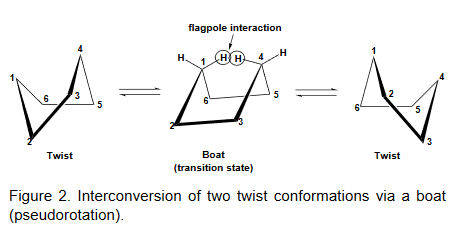

残念ながらすべてをスクリプトでは処理できなかったのでpymolを見ながら手で原子を入れ替えていった。cyclohexane.twistboatL.xtb.xyz および cyclohexane.twistboatR.xtb.xyzは、https://github.com/nakatamaho/quantumchemistry_notebook/tree/master/cyclohexane から入手してほしい。

In [19]:
!cp cyclohexane.twistboat.xtb.xyz cyclohexane.twistboatR.xtb.xyz
!python3 inverse_y.py cyclohexane.twistboatR.xtb.xyz > cyclohexane.twistboatL.xtb.xyz
!calculate_rmsd -e -p cyclohexane.twistboatR.xtb.xyz cyclohexane.twistboatL.xtb.xyz > l ; mv l cyclohexane.twistboatL.xtb.xyz
!cp cyclohexane.twistboatL_ok.xtb.xyz cyclohexane.twistboatL.xtb.xyz
!md5sum cyclohexane.twistboatL.xtb.xyz
!cp cyclohexane.twistboatR_ok.xtb.xyz cyclohexane.twistboatR.xtb.xyz
!md5sum cyclohexane.twistboatR.xtb.xyz

3a05a02f60a690e8ee93494bfa0742bd  cyclohexane.twistboatL.xtb.xyz
4a7525762ec53fe01f074673dd2b7f7c  cyclohexane.twistboatR.xtb.xyz


In [20]:
!rm -f ./scartch/initial0000.xyz
!cat cyclohexane.twistboatR.xtb.xyz cyclohexane.twistboatL.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!cat inpfileq

  18
 
 C         -1.5157007107       -0.0000305098       -0.0002787400
 C         -0.6516407028       -1.2042398246       -0.3951228484
 C          0.6518238461       -1.2039428064        0.3953988134
 C          1.5157433393        0.0000892288       -0.0002333358
 C          0.6516002624        1.2041584634       -0.3952071873
 C         -0.6518126887        1.2039688056        0.3954430309
 H         -1.2027288941        2.1291868822        0.2166666598
 H         -0.4169499699        1.1640978274        1.4608062012
 H          1.2023588565        2.1293567368       -0.2160382269
 H          0.4166957342        1.1646702516       -1.4605644077
 H          2.1622756921       -0.2673665175       -0.8384296148
 H          2.1627823865        0.2676102230        0.8375788650
 H          0.4169507044       -1.1641624675        1.4607570830
 H          1.2027262320       -2.1291477430        0.2165737344
 H         -0.4167747615       -1.1650987335       -1.4604829981
 H         -1.2024

gsmで中間体を求めると一つ負の固有値が求まったので正しいと思われる。計算時間は5分程度必要であった。

In [21]:
!/usr/bin/time ./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 5
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 25
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
 ---- Done preparing gradients ---- 


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.001 ss: 0.004 (DMAX: 0.100) predE: -0.00  E(M): 0.05 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss:


 growing iter: 7 
 adding node: 7 between 6 18 
 iR,iP: 6 18 iN: 7  dqmag: 1.00 dq0[constraint]: -0.09 
 initial Hint ev: 0.035 0.036 0.038 0.052
 adding node: 17 between 18 7 
 iR,iP: 18 7 iN: 17  dqmag: 1.00 dq0[constraint]: -0.10 
 initial Hint ev: 0.035 0.036 0.038 0.052
 rpart:  0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.00
 spacings (end ic_reparam, steps: 4):  0.51 0.50 0.50 0.50 0.50 0.51 0.51 1.57 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.57 0.51 0.50 0.49 0.50 0.50 0.50 0.51  disprms: 0.019 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: Th


 growing iter: 9 
 adding node: 9 between 8 16 
 iR,iP: 8 16 iN: 9  dqmag: 1.00 dq0[constraint]: -0.14 
 initial Hint ev: 0.035 0.036 0.038 0.052
 adding node: 15 between 16 9 
 iR,iP: 16 9 iN: 15  dqmag: 1.00 dq0[constraint]: -0.17 
 initial Hint ev: 0.035 0.036 0.038 0.052
 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.00 0.00 0.00 0.00 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00
 spacings (end ic_reparam, steps: 4):  0.51 0.50 0.50 0.50 0.50 0.50 0.51 0.51 0.50 1.21 0.00 0.00 0.00 0.00 0.00 1.21 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.51  disprms: 0.017 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: Th


 
 Opt step:  1  gqc: 0.000 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.04 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.006 (DMAX: 0.100) predE: -0.00  E(M): 0.14 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.009 (DMAX: 0.100) predE: -0.01  E(M): 0.29 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 0.45 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.011 (DMAX: 0.044) predE: -0.02  E(M): 0.62 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M): 0.79 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.013 (DMAX: 0.100) predE: -0.02  E(M): 0.96 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.014 (DMAX: 0.100) predE: -0.02  E(M): 1.11 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.015 (DMAX: 0.100) predE: -0.02  E(M): 1.22 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.000 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M): 1.32 gRMS: 0.0005 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M


 growing iter: 12 
 adding node: 12 between 11 13 
 iR,iP: 11 13 iN: 12  dqmag: 1.00 dq0[constraint]: -0.50 
 initial Hint ev: 0.035 0.036 0.038 0.052
 gopt_iter: string done growing 
 writing grown string scratch/stringfile.xyz0000g 
 
 initial ic_reparam 
 TSn: 0 rpart:  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 disp[1]: 0.07 disp[2]: 0.14 disp[3]: 0.21 disp[4]: 0.28 disp[5]: 0.36 disp[6]: 0.44 disp[7]: 0.50 disp[8]: 0.50 disp[9]: 0.50 disp[10]: 0.50 disp[11]: 0.50 disp[12]: 0.50 disp[13]: 0.50 disp[14]: 0.50 disp[15]: 0.50 disp[16]: 0.50 disp[17]: 0.50 disp[18]: 0.33 disp[19]: -0.17 disp[20]: -0.10 disp[21]: -0.03 disp[22]: 0.04 disp[23]: 0.05
 disp[1]: 0.02 disp[2]: 0.04 disp[3]: 0.06 disp[4]: 0.07 disp[5]: 0.09 disp[6]: 0.11 disp[7]: 0.15 disp[8]: 0.24 disp[9]: 0.34 disp[10]: 0.43 disp[11]: 0.47 disp[12]: 0.36 disp[13]: 0.16 disp[14]: 0.09 disp[15]: 0.18 disp[16]: 0.28 disp[17]: 0.13 disp[18]: 0.00 dis

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The fol

 3 way tangent (15): f1: 0.73 
 3 way tangent (18): f1: 0.39 

 slowing down climb optimization 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb

 3 way tangent (17): f1: 0.99 
 3 way tangent (18): f1: 0.51 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-poin

 3 way tangent (18): f1: 0.51 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IE

 spacings (end ic_reparam, steps: 5):  0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.51 0.51 0.51 0.51 0.51 0.51 0.51  disprms: 0.033 
 V_profile:  0.0 0.0 0.1 0.3 0.5 0.6 0.8 1.0 1.1 1.2 1.3 1.3 1.3 1.2 1.1 0.9 0.8 0.7 2.0 0.7 0.4 0.3 0.1 0.0 0.0
 3 way tangent (18): f1: 0.51 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following float

 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.01 disp[4]: -0.01 disp[5]: -0.01 disp[6]: -0.01 disp[7]: -0.01 disp[8]: -0.02 disp[9]: -0.02 disp[10]: -0.02 disp[11]: -0.02 disp[12]: -0.02 disp[13]: -0.02 disp[14]: -0.03 disp[15]: -0.03 disp[16]: -0.03 disp[17]: -0.03 disp[18]: 0.00 disp[19]: 0.01 disp[20]: 0.01 disp[21]: 0.01 disp[22]: 0.01 disp[23]: -0.00
 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.00 disp[4]: -0.01 disp[5]: -0.01 disp[6]: -0.01 disp[7]: -0.01 disp[8]: -0.01 disp[9]: -0.01 disp[10]: -0.01 disp[11]: -0.01 disp[12]: -0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.02 disp[16]: -0.02 disp[17]: -0.02 disp[18]: 0.00 disp[19]: 0.00 disp[20]: 0.00 disp[21]: 0.00 disp[22]: 0.00 disp[23]: 0.00
 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.00 disp[4]: -0.00 disp[5]: -0.00 disp[6]: -0.01 disp[7]: -0.01 disp[8]: -0.01 disp[9]: -0.01 disp[10]: -0.01 disp[11]: -0.01 disp[12]: -0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.01 disp[17]: -0.01 disp[18]: 0.00 disp[19]: 0.

 V_profile: 0.0 0.0 0.1 0.3 0.4 0.6 0.8 0.9 1.0 1.1 1.2 1.3 1.3 1.2 1.1 1.0 0.8 0.6 1.0 0.6 0.4 0.2 0.1 0.0 0.0
 TSn: 18 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.17 0.17 0.17 0.17 0.17 0.17
 disp[1]: 0.00 disp[2]: 0.01 disp[3]: 0.01 disp[4]: 0.01 disp[5]: 0.01 disp[6]: 0.01 disp[7]: 0.02 disp[8]: 0.02 disp[9]: 0.02 disp[10]: 0.02 disp[11]: 0.02 disp[12]: 0.02 disp[13]: 0.03 disp[14]: 0.03 disp[15]: 0.03 disp[16]: 0.01 disp[17]: -0.05 disp[18]: 0.00 disp[19]: 0.08 disp[20]: 0.05 disp[21]: 0.04 disp[22]: 0.02 disp[23]: 0.02
 disp[1]: 0.00 disp[2]: 0.00 disp[3]: -0.00 disp[4]: -0.00 disp[5]: -0.00 disp[6]: -0.00 disp[7]: -0.00 disp[8]: -0.00 disp[9]: -0.01 disp[10]: -0.01 disp[11]: -0.01 disp[12]: -0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.01 disp[17]: -0.02 disp[18]: 0.00 disp[19]: 0.00 disp[20]: 0.00 disp[21]: 0.00 disp[22]: 0.00 disp[23]: -0.02
 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.00 disp[4]: -0.00

 V_profile: 0.0 0.0 0.1 0.3 0.4 0.6 0.8 0.9 1.0 1.1 1.2 1.3 1.3 1.2 1.1 0.9 0.8 0.6 0.7 0.5 0.3 0.2 0.1 0.0 0.0
 TSn: 18 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.17 0.17 0.17 0.17 0.17 0.17
 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.01 disp[12]: 0.01 disp[13]: 0.01 disp[14]: 0.01 disp[15]: 0.00 disp[16]: 0.00 disp[17]: -0.01 disp[18]: 0.00 disp[19]: 0.05 disp[20]: 0.04 disp[21]: 0.03 disp[22]: 0.02 disp[23]: 0.01
 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: 0.00 disp[13]: 0.00 disp[14]: 0.00 disp[15]: 0.00 disp[16]: -0.00 disp[17]: -0.01 disp[18]: 0.00 disp[19]: 0.00 disp[20]: 0.00 disp[21]: 0.00 disp[22]: 0.00 disp[23]: -0.00
 spacings (end ic_reparam, steps: 5):  0.51 0.51 0.52 0.52 0.52 0.52 0.52

 check_for_reaction wts: 0 wint: 24 isrxn: 0 

 need to restart opt iters, TS node is not max E 

 opt_iters over: totalgrad: 0.044 gradrms: 0.0003 tgrads:  390  ol(0): 0.91 max E:  1.3 Erxn:  0.0 nmax: 11 TSnode: 18 
 V_profile:  0.0 0.0 0.1 0.3 0.4 0.6 0.7 0.9 1.0 1.1 1.2 1.3 1.3 1.2 1.1 0.9 0.8 0.6 0.5 0.4 0.3 0.2 0.1 0.0 0.0
 3 way tangent (11): f1: 0.90 

 slowing down climb optimization 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFL

 spacings (end ic_reparam, steps: 5):  0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.51 0.47  disprms: 0.037 
 V_profile:  0.0 0.0 0.1 0.3 0.4 0.6 0.7 0.9 1.0 1.1 1.2 1.2 1.2 1.2 1.1 0.9 0.8 0.6 0.5 0.4 0.3 0.2 0.1 0.0 0.0
 3 way tangent (11): f1: 0.89 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following float

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG

 mag/DTHRESH: 0.002394 0.000050 lamb/lambp: -0.001 0.000 
 mag/DTHRESH: 0.043263 0.000050 lamb/lambp: 0.002 0.000 
 mag/DTHRESH: 0.091195 0.000050 lamb/lambp: 0.007 0.000 

 Davidson iteration 2 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of x

In [22]:
!cp stringfile.xyz0000 cyclohexane.tbL2tbR.xtb.xyz

In [23]:
view = JsmolView()
display(view)
view.load('cyclohexane.tbL2tbR.xtb.xyz', inline=False)
view.script('anim mode palindrome 2 2 ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [24]:
!cp scratch/tsq0000.xyz cyclohexane.boat.xtb.xyz

In [25]:
view = JsmolView.from_file("cyclohexane.boat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

うまくボート型が作れた。

まとめ: イス型、ひずみボート型、半イス型、ボート型

In [26]:
view = JsmolView.from_file("cyclohexane.chair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [27]:
view = JsmolView.from_file("cyclohexane.halfchair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [28]:
view = JsmolView.from_file("cyclohexane.twistboat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [29]:
view = JsmolView.from_file("cyclohexane.boat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

実際の反応座標は二軸持ってくるのがわかりやすい。以下はA Three-Dimensional Energy Surface for the Conformational Inversion of CyclohexaneのFig.4である。ボート型を経る反転経路をとると60度捩じれることがわかる。

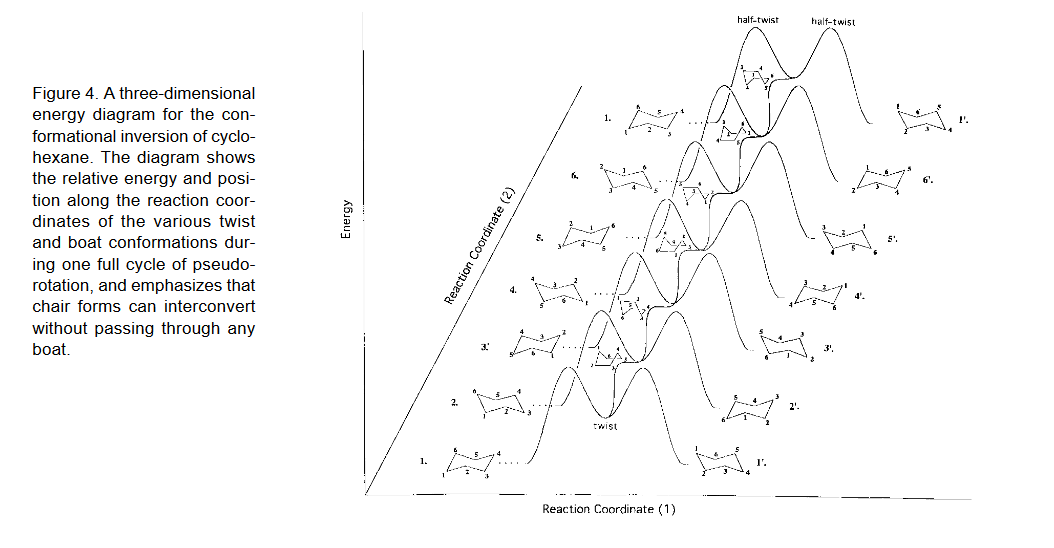

反応座標におけるエネルギーをプロットしてみよう。まずは、イス型からひずみボート型まで。
GMSの計算後、xyzファイルたちのコメントにkcal/mol単位で相対エネルギーが入っているため、それを利用する。

In [30]:
!python3 splitxyz.py cyclohexane.chair2twistboat.xtb.xyz a
!echo "coordinate,energy" > cyclohexane.chair2twistboat.energy.csv
!files=`ls a.????.xyz` ; for _file in $files; do B=`sed -n 2p $_file`; echo ", $B" ; done | cat -n | sed s/"\s"//g >> cyclohexane.chair2twistboat.energy.csv
!cat cyclohexane.chair2twistboat.energy.csv

output: a.0000.xyz 
output: a.0001.xyz 
output: a.0002.xyz 
output: a.0003.xyz 
output: a.0004.xyz 
output: a.0005.xyz 
output: a.0006.xyz 
output: a.0007.xyz 
output: a.0008.xyz 
output: a.0009.xyz 
output: a.0010.xyz 
output: a.0011.xyz 
output: a.0012.xyz 
output: a.0013.xyz 
output: a.0014.xyz 
output: a.0015.xyz 
output: a.0016.xyz 
output: a.0017.xyz 
output: a.0018.xyz 
output: a.0019.xyz 
output: a.0020.xyz 
output: a.0021.xyz 
output: a.0022.xyz 
output: a.0023.xyz 
output: a.0024.xyz 
coordinate,energy
1,0.000000
2,0.225367
3,0.845312
4,1.771533
5,2.929609
6,4.232669
7,5.595775
8,6.942679
9,8.211860
10,9.337727
11,10.266735
12,10.949875
13,11.401342
14,11.536085
15,11.372553
16,11.006199
17,10.320982
18,9.591494
19,8.773931
20,8.033475
21,7.206599
22,6.531284
23,5.935836
24,5.547533
25,5.385782


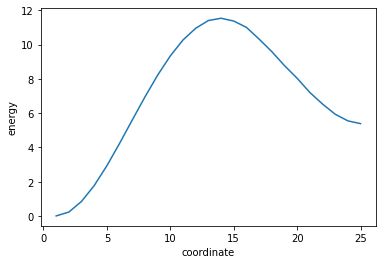

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("cyclohexane.chair2twistboat.energy.csv")
plt.plot(data['coordinate'], data['energy'])
plt.xlabel('coordinate')
plt.ylabel('energy')
plt.show()

上の図は左がイス型のシクロヘキサン、右が歪みボート型。もっともエネルギーが高いものが半イス型となっている。
遷移状態は、イス型と比べて11.535050kcal/mol(=48.1kJ/mol)エネルギーが高い。ほぼwikipediaの値と一致した。
次に、ひずみボート型-ボート型のエネルギー差を求める。

In [32]:
!python3 splitxyz.py cyclohexane.tbL2tbR.xtb.xyz a
!echo "coordinate,energy" > cyclohexane.tb2tb.energy.csv
!files=`ls a.????.xyz` ; for _file in $files; do B=`sed -n 2p $_file`; echo ", $B" ; done | cat -n | sed s/"\s"//g >> cyclohexane.tb2tb.energy.csv
!cat cyclohexane.tb2tb.energy.csv

output: a.0000.xyz 
output: a.0001.xyz 
output: a.0002.xyz 
output: a.0003.xyz 
output: a.0004.xyz 
output: a.0005.xyz 
output: a.0006.xyz 
output: a.0007.xyz 
output: a.0008.xyz 
output: a.0009.xyz 
output: a.0010.xyz 
output: a.0011.xyz 
output: a.0012.xyz 
output: a.0013.xyz 
output: a.0014.xyz 
output: a.0015.xyz 
output: a.0016.xyz 
output: a.0017.xyz 
output: a.0018.xyz 
output: a.0019.xyz 
output: a.0020.xyz 
output: a.0021.xyz 
output: a.0022.xyz 
output: a.0023.xyz 
output: a.0024.xyz 
coordinate,energy
1,0.000000
2,0.036119
3,0.127282
4,0.258191
5,0.411000
6,0.572167
7,0.731715
8,0.878902
9,1.007734
10,1.111259
11,1.203087
12,1.241170
13,1.238629
14,1.201142
15,1.120928
16,0.975869
17,0.814231
18,0.701758
19,0.575279
20,0.439846
21,0.313380
22,0.217736
23,0.110183
24,0.035090
25,0.000006


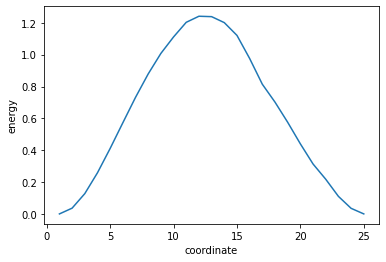

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("cyclohexane.tb2tb.energy.csv")
plt.xlabel('coordinate')
plt.ylabel('energy')
plt.plot(data['coordinate'], data['energy'])
plt.show()

左が歪みボート型、右も歪みボート型である。エネルギー障壁は以上のように1.241170kcal/mol(=5kJ/mol)これもほぼwikipediaの値と一致した。

おまけ
失敗例。シクロヘキサンの歪みボート型-歪みボート型の遷移状態を求めようとして、とりあえず鏡像体を作り、二つの構造の重ね合わせを見ながら水素を入れ替える。つまり、シクロヘキサンのエカトリアル位とアキシアル位の水素が反転するのだろう、と仮定するわけだ。しかしこれだと失敗する。なぜなら、この場合正六角形の遷移状態をへるが、エネルギー障壁が20kcal/molと高すぎるためである。従ってそのような遷移はほとんど起きないと考えられる。

In [34]:
!rm -f ./scartch/initial0000.xyz
!cat cyclohexane.twistboatRng.xtb.xyz cyclohexane.twistboatLng.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!cat inpfileq

  18
 
 C         -0.6515298075       -1.2041425126        0.3952488082
 C          0.6518632526       -1.2038873888       -0.3954005117
 C          1.5157982497        0.0001190629        0.0001901396
 C          0.6516255969        1.2041637605        0.3950972106
 C         -0.6520049831        1.2039521182       -0.3952123095
 C         -1.5157691903       -0.0002377042        0.0001087993
 H         -2.1622289796       -0.2678434049       -0.8380688910
 H         -2.1628193310        0.2668800435        0.8379751095
 H         -0.4173462929        1.1646974597       -1.4607123495
 H          1.2023143147        2.1293300919        0.2154268515
 H          0.4170588669        1.1649289689        1.4605697006
 H         -1.2030141752        2.1289829867       -0.2157585987
 H          2.1623338203       -0.2673427064        0.8384147194
 H          2.1628274492        0.2676194252       -0.8376713701
 H         -1.2023432353       -2.1293676237        0.2161707973
 H          0.4170

In [35]:
!/usr/bin/time ./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 5
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 25
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
 ---- Done preparing gradients ---- 



 growing iter: 4 
 adding node: 4 between 3 21 
 iR,iP: 3 21 iN: 4  dqmag: 0.99 dq0[constraint]: -0.06 
 initial Hint ev: 0.035 0.036 0.037 0.051
 adding node: 20 between 21 4 
 iR,iP: 21 4 iN: 20  dqmag: 0.99 dq0[constraint]: -0.06 
 initial Hint ev: 0.035 0.036 0.037 0.051
 rpart:  0.12 0.12 0.12 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.12 0.12 0.12 0.00
 spacings (end ic_reparam, steps: 4):  0.72 0.68 0.68 0.67 2.86 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.86 0.67 0.68 0.68 0.72  disprms: 0.048 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: Th

 initial Hint ev: 0.035 0.035 0.036 0.051
 rpart:  0.08 0.08 0.08 0.08 0.08 0.08 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0.08 0.08 0.08 0.08 0.08 0.00
 spacings (end ic_reparam, steps: 4):  0.72 0.69 0.69 0.68 0.68 0.68 2.51 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.51 0.68 0.68 0.68 0.69 0.69 0.72  disprms: 0.044 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination 


 growing iter: 8 
 adding node: 8 between 7 17 
 iR,iP: 7 17 iN: 8  dqmag: 1.00 dq0[constraint]: -0.11 
 initial Hint ev: 0.035 0.035 0.036 0.050
 adding node: 16 between 17 8 
 iR,iP: 17 8 iN: 16  dqmag: 1.00 dq0[constraint]: -0.12 
 initial Hint ev: 0.035 0.035 0.036 0.050
 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00
 spacings (end ic_reparam, steps: 4):  0.72 0.69 0.69 0.69 0.69 0.68 0.68 0.68 2.11 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.11 0.68 0.68 0.68 0.69 0.69 0.69 0.69 0.72  disprms: 0.042 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: Th

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.003 ss: 0.004 (DMAX: 0.100) predE: -0.00  E(M): 0.55 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.007 (DMAX: 0.100) predE: -0.00  E(M): 1.86 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.007 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 3.73 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.008 ss: 0.012 (DMAX: 0.100) predE: -0.01  E(M): 6.00 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.009 ss: 0.015 (DMAX: 0.100) predE: -0.02  E(M): 8.49 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.009 ss: 0.


 growing iter: 11 
 adding node: 11 between 10 14 
 iR,iP: 10 14 iN: 11  dqmag: 1.00 dq0[constraint]: -0.33 
 initial Hint ev: 0.035 0.035 0.035 0.049
 adding node: 13 between 14 11 
 iR,iP: 14 11 iN: 13  dqmag: 1.00 dq0[constraint]: -0.50 
 initial Hint ev: 0.035 0.035 0.035 0.049
 rpart:  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00
 spacings (end ic_reparam, steps: 4):  0.72 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.68 0.68 1.25 0.00 1.25 0.70 0.68 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.72  disprms: 0.040 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
N

 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.01 disp[5]: 0.01 disp[6]: 0.01 disp[7]: 0.01 disp[8]: 0.01 disp[9]: 0.01 disp[10]: 0.01 disp[11]: 0.01 disp[12]: 0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.01 disp[17]: -0.01 disp[18]: -0.01 disp[19]: -0.01 disp[20]: -0.01 disp[21]: -0.00 disp[22]: -0.00 disp[23]: -0.00
 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.01 disp[10]: 0.01 disp[11]: 0.01 disp[12]: 0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.00 disp[17]: -0.00 disp[18]: -0.00 disp[19]: -0.00 disp[20]: -0.00 disp[21]: -0.00 disp[22]: -0.00 disp[23]: -0.00
 spacings (end ic_reparam, steps: 25):  0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.72 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71  disprms: 0.020 


 Starting String opt 
 V_profile:  0.0 0.5 1.9 3.7 6.0 8.5 11.0 13.5 15.8 17.8 19.5 20.6 0.0 20.6 19.5 17.8 15.9 13.6 11.1 

 V_profile: 0.0 0.5 1.9 3.9 6.3 9.0 11.7 14.3 16.6 18.6 20.1 21.0 21.3 21.0 20.1 18.6 16.6 14.3 11.7 9.0 6.3 3.9 1.9 0.5 0.0
 TSn: 12 rpart:  0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.00 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08
 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: 0.00 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.01 disp[17]: -0.01 disp[18]: -0.01 disp[19]: -0.01 disp[20]: -0.01 disp[21]: -0.00 disp[22]: -0.00 disp[23]: -0.00
 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: 0.00 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.00 disp[17]: -0.00 disp[18]: -0.00 disp[19]: -0.00 disp[20]: -0.00 disp[21]: -0.00 disp[22]: -0.00 disp[23]: -0.00
 spacings (end ic_reparam, steps: 5):  0

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point except


 mag/DTHRESH: 0.004118 0.000050 lamb/lambp: -0.003 -0.003 
 vector 0 converged 
 mag/DTHRESH: 0.000130 0.000050 lamb/lambp: -0.003 -0.003 
 vector 1 converged 
 mag/DTHRESH: 0.000061 0.000050 lamb/lambp: -0.003 -0.003 
 vector 2 converged 

 Davidson iteration 3 

 mag/DTHRESH: 0.004118 0.000050 lamb/lambp: -0.003 -0.003 
 vector 0 converged 
 mag/DTHRESH: 0.000130 0.000050 lamb/lambp: -0.003 -0.003 
 vector 1 converged 
 mag/DTHRESH: 0.000061 0.000050 lamb/lambp: -0.003 -0.003 
 vector 2 converged 
 Davidson converged 

 now saving vibrations to stringfile.xyz0000fr 
 Hessian eigenvalues: -0.003 -0.003 -0.003

 Updating Hint with new vectors 
 updating vector: 1 with curvature: -0.00346 
 updating vector: 2 with curvature: -0.00330 
 updating vector: 3 with curvature: -0.00283 

 Davidson required 12 gradients 

 found 3 negative eigenvalues 
 creating final string file  

 about to write tsq.xyz, tscontinue: 1 endearly: 0 
 check_for_reaction wts: 0 wint: 24 isrxn: 0 
 E of min node

In [42]:
!cp scratch/tsq0000.xyz cyclohexane.hex.xtb.xyz

In [37]:
view = JsmolView.from_file("cyclohexane.hex.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

これは正六角形をもった新しい遷移状態ではないか、とも思えるが、エネルギー障壁は21.3kcal/molもあるため、この経路はほとんど起こらないだろう。反応座標とエネルギーのプロットを見てみよう。

In [38]:
!cp stringfile.xyz0000 cyclohexane.tb2hex2tb.xtb.xyz

In [39]:
!python3 splitxyz.py cyclohexane.tb2hex2tb.xtb.xyz a
!echo "coordinate,energy" > cyclohexane.tb2hex2tb.energy.csv
!files=`ls a.????.xyz` ; for _file in $files; do B=`sed -n 2p $_file`; echo ", $B" ; done | cat -n | sed s/"\s"//g >> cyclohexane.tb2hex2tb.energy.csv
!cat cyclohexane.tb2hex2tb.energy.csv

output: a.0000.xyz 
output: a.0001.xyz 
output: a.0002.xyz 
output: a.0003.xyz 
output: a.0004.xyz 
output: a.0005.xyz 
output: a.0006.xyz 
output: a.0007.xyz 
output: a.0008.xyz 
output: a.0009.xyz 
output: a.0010.xyz 
output: a.0011.xyz 
output: a.0012.xyz 
output: a.0013.xyz 
output: a.0014.xyz 
output: a.0015.xyz 
output: a.0016.xyz 
output: a.0017.xyz 
output: a.0018.xyz 
output: a.0019.xyz 
output: a.0020.xyz 
output: a.0021.xyz 
output: a.0022.xyz 
output: a.0023.xyz 
output: a.0024.xyz 
coordinate,energy
1,0.000000
2,0.522199
3,1.898689
4,3.901638
5,6.319088
6,8.967640
7,11.667785
8,14.259448
9,16.597369
10,18.558789
11,20.035385
12,20.954823
13,21.288264
14,20.962761
15,20.048870
16,18.576246
17,16.616746
18,14.278970
19,11.685763
20,8.982794
21,6.330571
22,3.909256
23,1.902605
24,0.523831
25,0.000000


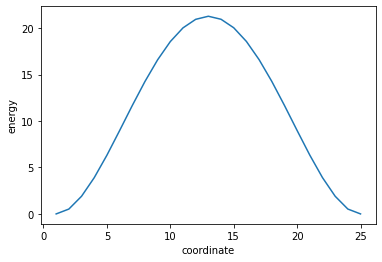

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("cyclohexane.tb2hex2tb.energy.csv")
plt.xlabel('coordinate')
plt.ylabel('energy')
plt.plot(data['coordinate'], data['energy'])
plt.show()

お疲れさまでした。以上